In [1]:
import pandas as pd
import numpy as np
from pandas import Timestamp
import empyrical

In [2]:
#from lumina.empyrical.gentic.pyplot_drawer import plot_his_profit

In [3]:
#names = [
#        'ultron_1751492470196206','ultron_1751395662731039'
#    ]
task_id = '200036'
method= 'aicso0'

In [4]:
time_periods = {
    'train_time': (Timestamp('2022-07-25 09:31:00'), Timestamp('2024-05-29 13:22:00')),
    'val_time': (Timestamp('2024-05-29 13:23:00'), Timestamp('2024-12-05 10:15:00')),
    'test_time': (Timestamp('2024-12-05 10:16:00'), Timestamp('2025-03-13 15:00:00'))
}

In [5]:
def create_returns(names, task_id, method, mode='a_ret', key=None):
    res1 = []
    for name in names:
        if isinstance(key, str):
            temp = "temp/{0}/{1}/returns/{2}/{3}.feather".format(
                method, str(task_id), key, name)
        else:
            temp = "temp/{0}/{1}/returns/{2}.feather".format(
                method, str(task_id), name)
        cumulative_returns = pd.read_feather(temp).set_index(
            'trade_time')[mode]
        cumulative_returns.name = key + "_" + name
        res1.append(cumulative_returns)
    return pd.concat(res1, axis=1)


In [6]:
#benchmark_returns = create_returns(names=names, task_id=task_id)

In [7]:
benchmark_returns = create_returns(names=['equal_weight','train_fitness_weight','vol_inv_weight'], task_id=task_id, method=method, 
                                          key='tst1')
benchmark_returns.head()

,tst1_equal_weight,tst1_train_fitness_weight,tst1_vol_inv_weight
trade_time,,,
2022-07-25,-0.004925,-0.004608,-0.000296
2022-07-26,0.004318,0.004025,0.000140
2022-07-27,-0.002095,-0.002039,-0.000772
2022-07-28,-0.000541,-0.000456,0.000379
2022-07-29,0.001533,0.001393,-0.000239


In [8]:
#benchmark_returns1 = create_returns(names=['equal_weight','train_fitness_weight','vol_inv_weight',
#                                          'lasso','rigde'], task_id=task_id, key='bk1')
#benchmark_returns1.head()

In [9]:
tst2_returns = create_returns(names=['equal_weight','train_fitness_weight','vol_inv_weight'], task_id=task_id, method=method, 
                              key='tst2')
tst2_returns.head()

,tst2_equal_weight,tst2_train_fitness_weight,tst2_vol_inv_weight
trade_time,,,
2022-07-25,-0.002637,-0.002324,0.000005
2022-07-26,0.005724,0.005695,0.002143
2022-07-27,0.002377,0.002724,0.001847
2022-07-28,0.000237,0.000340,0.000626
2022-07-29,-0.000344,-0.000551,-0.000989


In [15]:
#tst4_returns = create_returns(names=['equal_weight','train_fitness_weight','vol_inv_weight',
#                                          'lasso','rigde'], task_id=task_id, key='tst4')
#tst4_returns.head()

In [16]:
#tst3_returns = create_returns(names=['equal_weight','train_fitness_weight','vol_inv_weight',
#                                          'lasso','rigde'], task_id=task_id, key='tst3')
#tst3_returns.head()

In [17]:
cumulative_returns = pd.concat([benchmark_returns,tst2_returns],axis=1)
cumulative_returns.head()

,tst1_equal_weight,tst1_train_fitness_weight,tst1_vol_inv_weight,tst2_equal_weight,tst2_train_fitness_weight,tst2_vol_inv_weight
trade_time,,,,,,
2022-07-25,-0.004925,-0.004608,-0.000296,-0.002637,-0.002324,0.000005
2022-07-26,0.004318,0.004025,0.000140,0.005724,0.005695,0.002143
2022-07-27,-0.002095,-0.002039,-0.000772,0.002377,0.002724,0.001847
2022-07-28,-0.000541,-0.000456,0.000379,0.000237,0.000340,0.000626
2022-07-29,0.001533,0.001393,-0.000239,-0.000344,-0.000551,-0.000989


In [18]:
def create_empyrical(cumulative_returns, types=['all','train','val','test']):
    res = []
    for column in cumulative_returns.columns:
        dt = {'name': column}
        for tp in types:
            if tp == 'all':
                all_fitness = empyrical.sharpe_ratio(returns=cumulative_returns[column],
                                                  period=empyrical.DAILY)
                dt['all_sharpe'] = all_fitness
            if tp == 'train':
                train_fitness = empyrical.sharpe_ratio(returns=cumulative_returns.loc[time_periods['train_time'][0]:time_periods['train_time'][1]][column],
                                               period=empyrical.DAILY)
                dt['train_sharpe'] = train_fitness
            if tp == 'val':
                val_fitness = empyrical.sharpe_ratio(returns=cumulative_returns.loc[time_periods['val_time'][0]:time_periods['val_time'][1]][column],
                                               period=empyrical.DAILY)
                dt['val_sharpe'] = val_fitness
            if tp == 'test':
                test_fitness = empyrical.sharpe_ratio(returns=cumulative_returns.loc[time_periods['test_time'][0]:time_periods['test_time'][1]][column],
                                               period=empyrical.DAILY)
                dt['test_sharpe'] = test_fitness
        res.append(dt)
    return pd.DataFrame(res)

In [19]:
def create_empyrical(cumulative_returns, types=['all','train','val','test']):
    res = []
    for column in cumulative_returns.columns:
        dt = {'name': column}
        for tp in types:
            if tp == 'all':
                all_fitness = empyrical.sharpe_ratio(returns=cumulative_returns[column],
                                                  period=empyrical.DAILY)
                dt['all_sharpe'] = all_fitness
            if tp == 'train':
                train_fitness = empyrical.sharpe_ratio(returns=cumulative_returns.loc[time_periods['train_time'][0]:time_periods['train_time'][1]][column],
                                               period=empyrical.DAILY)
                dt['train_sharpe'] = train_fitness
            if tp == 'val':
                val_fitness = empyrical.sharpe_ratio(returns=cumulative_returns.loc[time_periods['val_time'][0]:time_periods['val_time'][1]][column],
                                               period=empyrical.DAILY)
                dt['val_sharpe'] = val_fitness
            if tp == 'test':
                test_fitness = empyrical.sharpe_ratio(returns=cumulative_returns.loc[time_periods['test_time'][0]:time_periods['test_time'][1]][column],
                                               period=empyrical.DAILY)
                dt['test_sharpe'] = test_fitness
        res.append(dt)
    return pd.DataFrame(res)

In [20]:
#cumulative_returns

In [21]:
from lumina.empyrical.gentic.pyplot_drawer import plot_his_profit

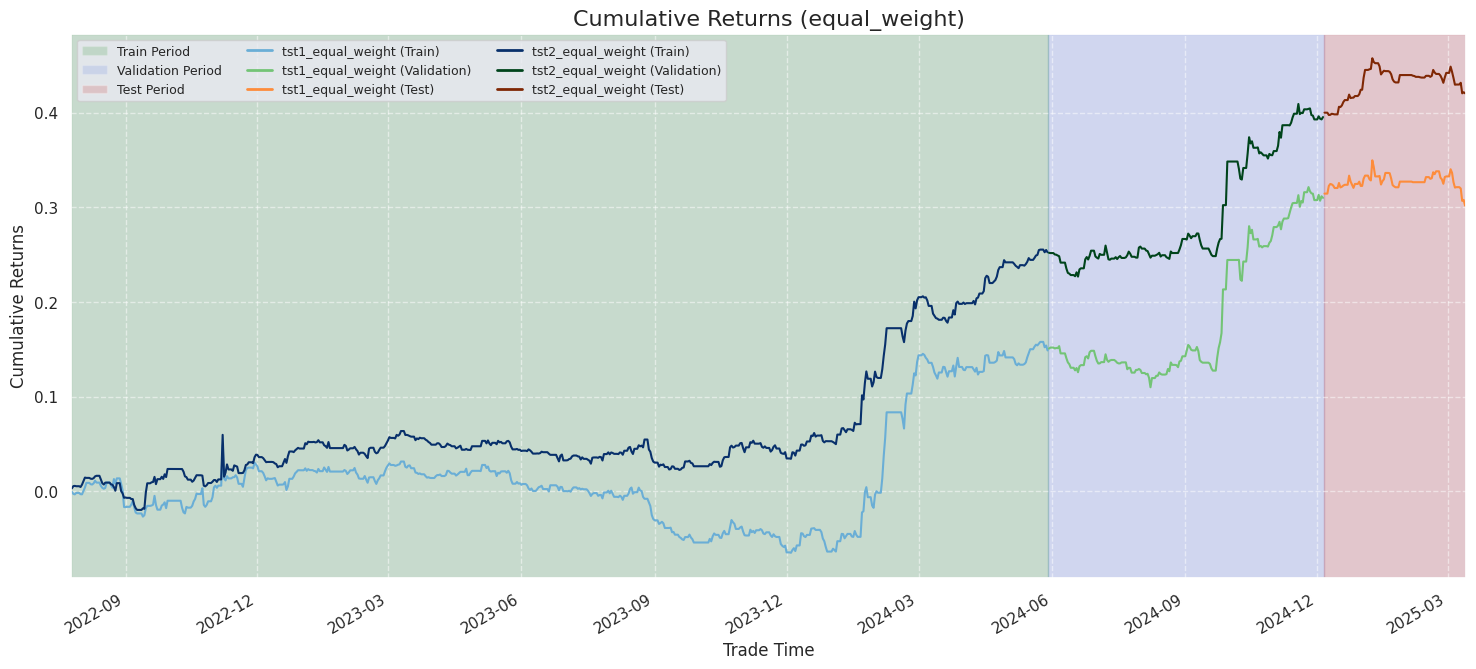

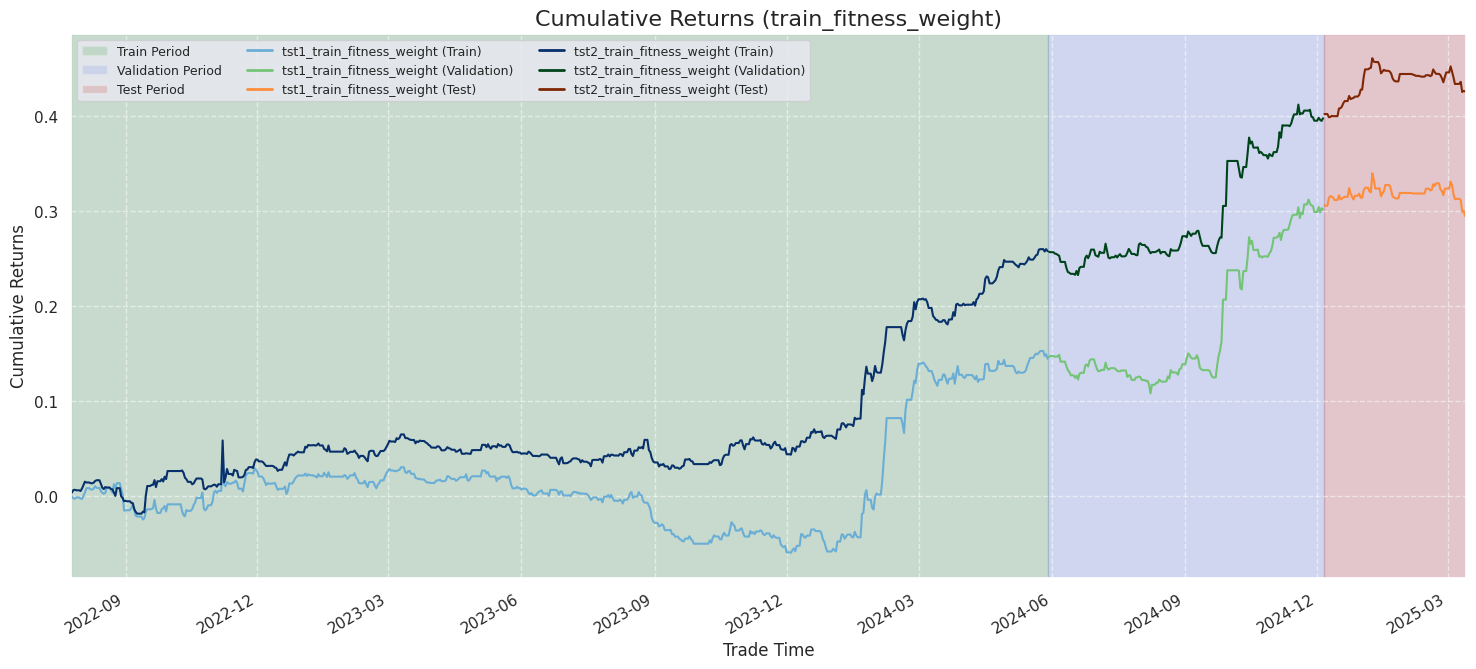

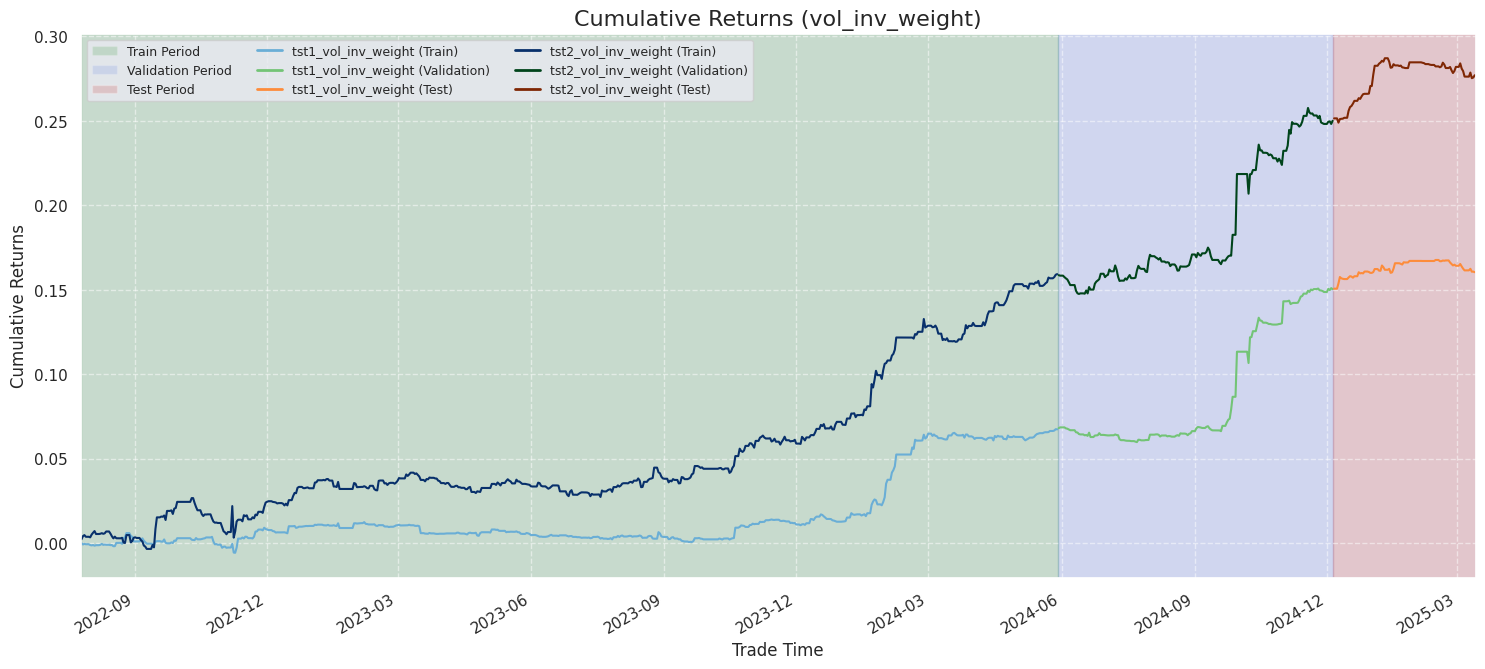

,name,train_sharpe,val_sharpe,test_sharpe
0,tst1_equal_weight,0.778129,2.150855,-0.299411
1,tst2_equal_weight,1.410198,2.042539,1.158673
0,tst1_train_fitness_weight,0.798388,2.202341,-0.262008
1,tst2_train_fitness_weight,1.460040,2.022268,1.331259
0,tst1_vol_inv_weight,1.610375,2.596830,1.680147
1,tst2_vol_inv_weight,2.004108,2.110104,2.742358


In [22]:
category = ['equal_weight','train_fitness_weight','vol_inv_weight']

r1 = []
for cty in category:
    select_returns = cumulative_returns.filter(regex='{0}$'.format(cty))
    plot_his_profit(cumulative_returns=select_returns.cumsum(), 
                time_periods=time_periods, name=cty)
    res = create_empyrical(cumulative_returns=select_returns,  types=['train','val','test'])
    r1.append(res)
pd.concat(r1,axis=0)

In [17]:
select_returns

,bk_rigde,tst3_rigde,tst4_rigde,tst5_rigde
trade_time,,,,
2022-07-25,-0.004064,-0.003268,-0.003003,-0.002432
2022-07-26,-0.002015,-0.004639,-0.000602,-0.000223
2022-07-27,-0.000985,-0.006180,-0.005922,-0.004713
2022-07-28,0.003332,0.000276,-0.003073,-0.004137
2022-07-29,-0.006998,-0.011017,-0.009410,-0.008255
...,...,...,...,...
2025-03-09,0.000000,0.000000,0.000000,0.000000
2025-03-10,-0.003782,-0.005397,-0.000393,-0.000932
2025-03-11,0.018158,0.011349,0.010912,0.008880
